# Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable:**

- Loan_Status

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

The output variable can have only two values i.e. Y and N, so this is a Logistic Regression problem.

## Importing Libraries

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Import

In [115]:
ds=pd.read_csv('loan_prediction.csv')
df=pd.DataFrame(ds)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The target varible is 'Loan_Status' which indicates whether an individual's loan will be approved or not. So it can have only 2 possible values 'N' and 'Y'.
We have 12 different variables which can be used as feature to predict the outcome of our target. Also we can clearly see that there are missing values in 'LoanAmount'. The missings can irritate our algorithms, so cleaning is a crucial part.

# Analysis of Data

In [116]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations:
    
- The standard deviation is very high for the column 'ApplicantIncome', which indicates that the data is very much scattered.
- The standard deviation is also very high for the column 'CoapplicantIncome', which also indicated scattering of data.
- The difference between max and min value (range) is very high for ApplicantIncome and CoapplicantIncome, meaning that there might be some outliers in the data.
- The min value for CoapplicantIncome is zero, which might be the case if there is no co-applicant present in a loan application.

## Checking Missing data

In [117]:
print("Missing in our dataset: ")
display(df.isnull().sum())

Missing in our dataset: 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have missing values in columns 'Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History'.

In [118]:
print('Missing values in Gender: ')
print('Missing Count: ',df['Gender'].isnull().sum())
print('Missing Percentage: ', df['Gender'].isnull().sum()/len(df)*100)

Missing values in Gender: 
Missing Count:  13
Missing Percentage:  2.1172638436482085


We can see that approax 2% values are missing from the column 'Gender'.

In [119]:
df_miss=['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term','Credit_History']
for i in df_miss:
    print('Missing values in ',i,' :')
    print('Missing Count: ',df[i].isnull().sum())
    print('Missing Percentage: ', df[i].isnull().sum()/len(df)*100)
    print('--------------------------------------------------------')

Missing values in  Gender  :
Missing Count:  13
Missing Percentage:  2.1172638436482085
--------------------------------------------------------
Missing values in  Dependents  :
Missing Count:  15
Missing Percentage:  2.44299674267101
--------------------------------------------------------
Missing values in  Self_Employed  :
Missing Count:  32
Missing Percentage:  5.211726384364821
--------------------------------------------------------
Missing values in  LoanAmount  :
Missing Count:  22
Missing Percentage:  3.5830618892508146
--------------------------------------------------------
Missing values in  Loan_Amount_Term  :
Missing Count:  14
Missing Percentage:  2.2801302931596092
--------------------------------------------------------
Missing values in  Credit_History  :
Missing Count:  50
Missing Percentage:  8.143322475570033
--------------------------------------------------------


We can see the percentage and count of missing data in above output. Lets plot heatmap for missing values.

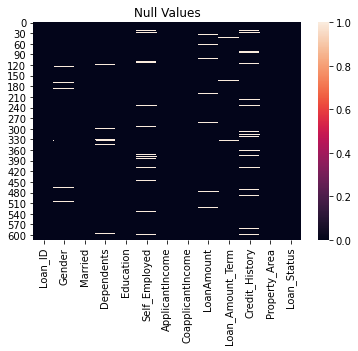

In [120]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

The above heatmap also confirms the presence of outliers in our dataset.

## Univariate Analysis

**Target Variable - Categorical**

We will first analyse our target variable i.e Loan_Status. We will plot frequency table,percentage distribution and bar plot as this is a categorical variable.

In [121]:
#Frequency table- this gives us count of each category.
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

422 loans were approved while 192 were rejected in our dataset.

In [122]:
# percentage distribution - this gives us the proportion of each variable.
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

68.7% loans were approved while 31.2% loans were rejected.

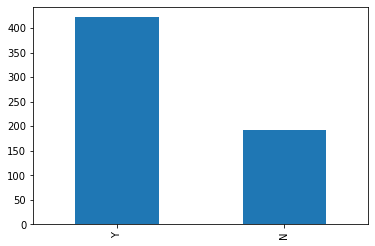

In [123]:
df['Loan_Status'].value_counts().plot.bar()

**Independent Variables - Categorical**

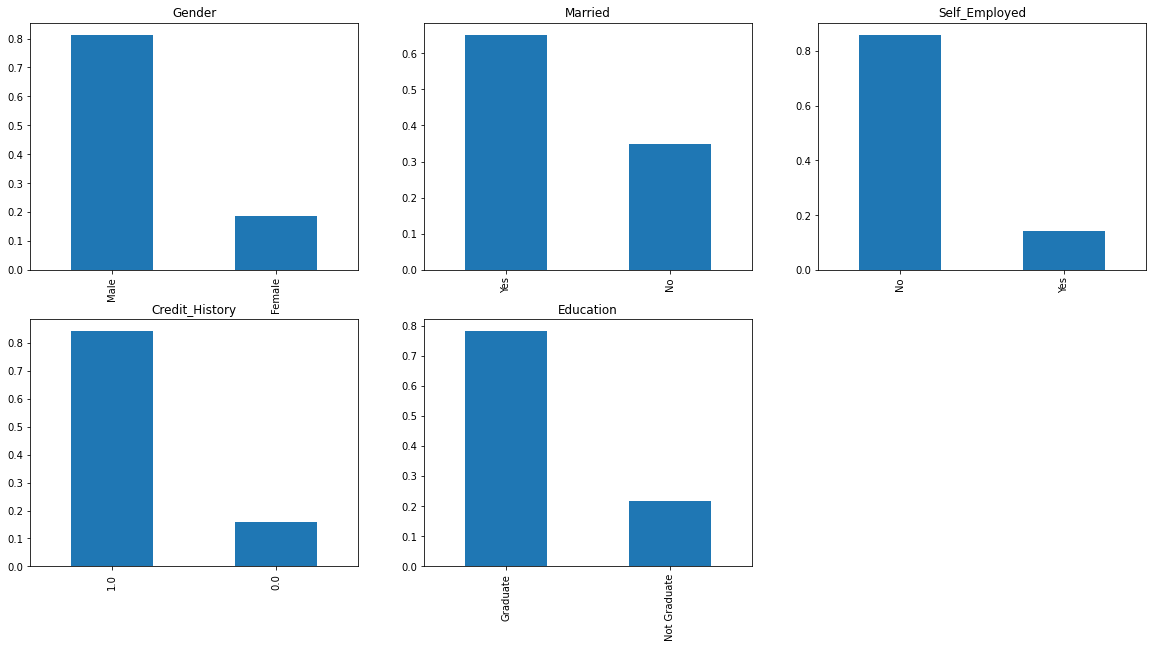

In [124]:
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

Observations from above plot:
    
- 80% applicants are Male.
- Approax 80% applicants are graduates.
- More than 60% applicants are married.
- More than 80% applicants are self-employed.
- More than 80% applicants have Credit history.

**Independent Variables - Ordinal**

Ordinal Variables have some order involved. Like we have values 'Urban', 'Rural' and 'Semiurban'. In the same way, we have values 0,1,2,3+ in 'Dependents' column. 

In [125]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [126]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

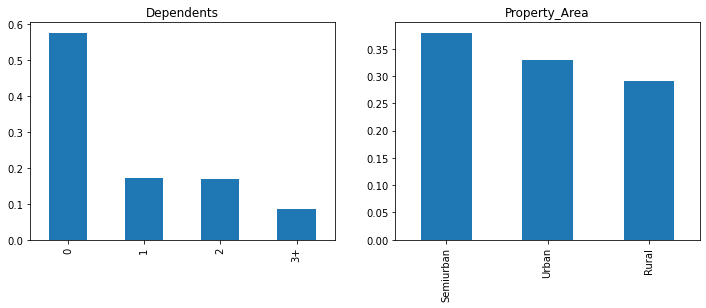

In [127]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Observations:
    
- More than 50% of applicants do not have any dependents.
- The applicants from 'Semiurban' area have maximum count, followed by Urban people and then Rural area people.

**Independent Variable - Numerical**

In [128]:
df_num=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'] 
df_num

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

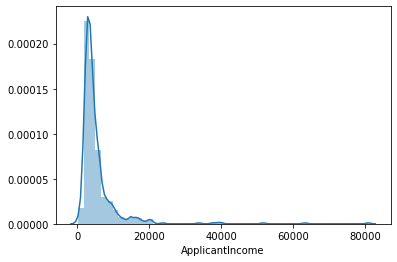

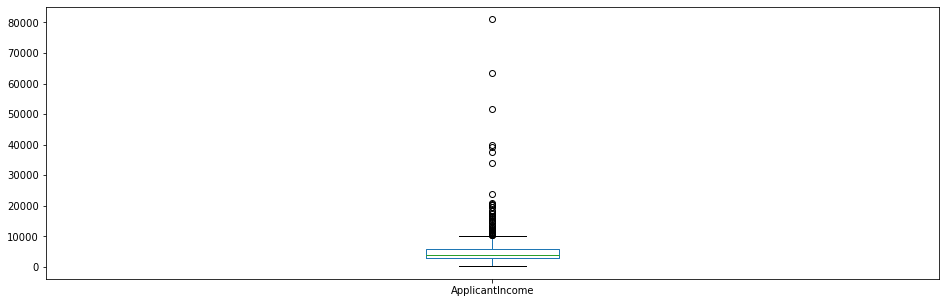

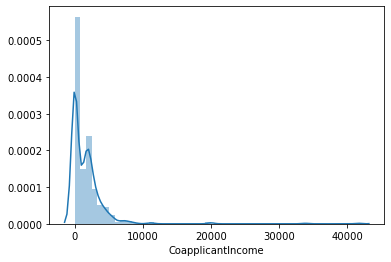

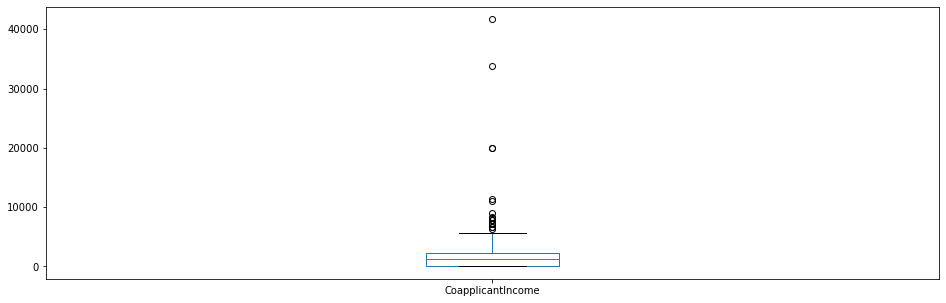

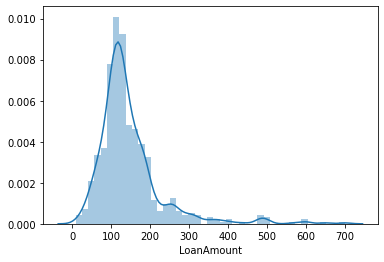

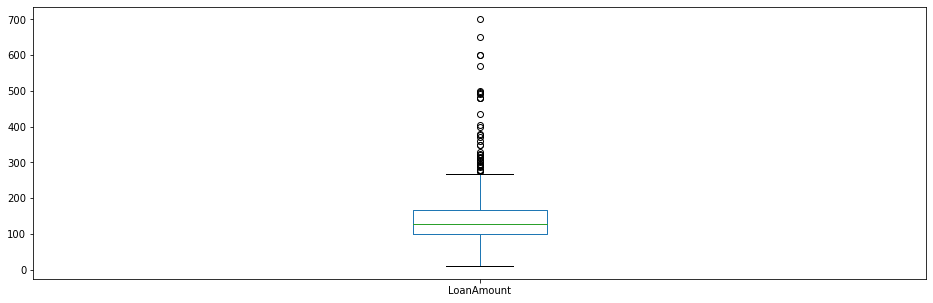

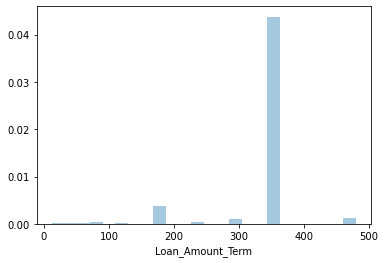

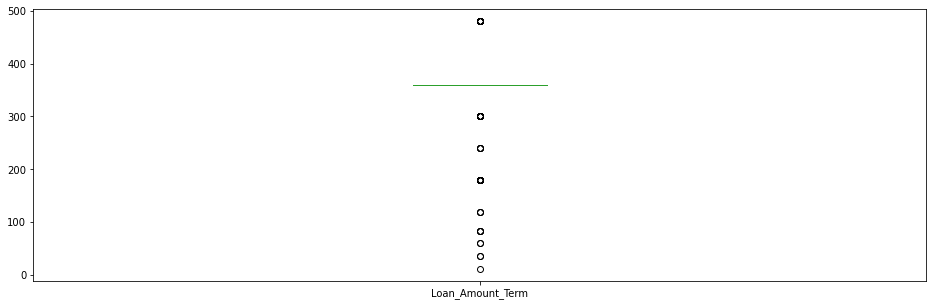

In [129]:
for i in df_num:
    
    plt.figure()
    sns.distplot(df[i])
    
    plt.figure()
    df[i].plot.box(figsize=(16,5))
    
    plt.show()

Observations:
    
- 'ApplicantIncome' data is positive skewed, which means the distribution is towards left. We will make it normal in further steps.
- 'ApplicantIncome' boxplot confirms the presence of outliers. We will be removing outliers in further steps.
- 'CoapplicantIncome' data is also positive skewed. Also there are lot of outliers.
- 'LoanAmount' distribution seems closer to normal distribution but still skewed.
- There are outliers present in 'LoanAmount' data. It means that for some of the cases, the loan amount is too high.
- There are outliers present in 'Loan_Amount_Term' data as well.

<Figure size 432x288 with 0 Axes>

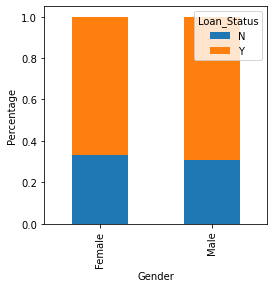

<Figure size 432x288 with 0 Axes>

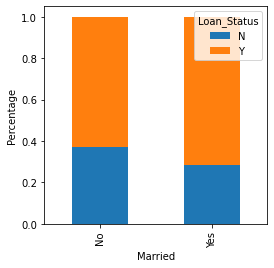

<Figure size 432x288 with 0 Axes>

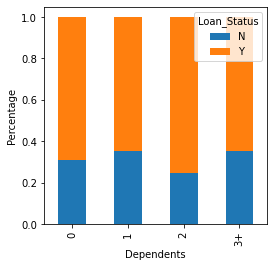

<Figure size 432x288 with 0 Axes>

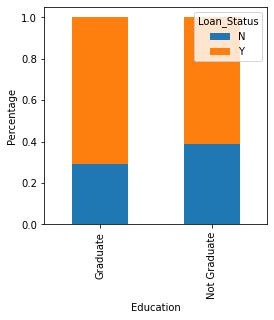

<Figure size 432x288 with 0 Axes>

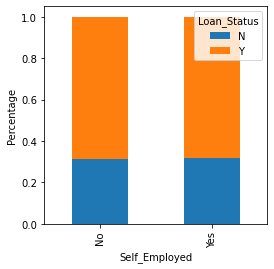

<Figure size 432x288 with 0 Axes>

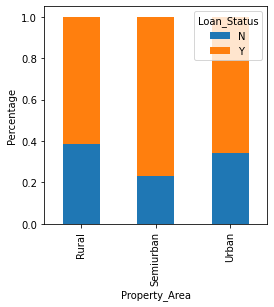

<Figure size 432x288 with 0 Axes>

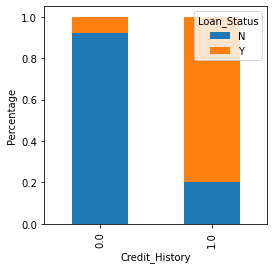

In [130]:
#categorical independent variables bivariate analysis
df_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Credit_History']
for i in df_cat:
    col=pd.crosstab(df[i],df['Loan_Status'])
    plt.figure()
    col.div(col.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
    plt.xlabel(i)
    p = plt.ylabel('Percentage')
    

Observations:
    
- Gender column has no impact on Loan Status.
- Married applicants have more loan approval ratio than unmarried applicants.
- Applicants having 1 and 3+ dependents have almost same approval rate.
- Graduates have more approval rate than non-graduate applicants.
- We are unable to conclude any relationship between Self_Employed and Loan_Status.
- Semiurban applicants have got more loans approved than Rural and Urban applicants.
- Applicants with credit history 1 have more chances for loan approval than applicants with credit history 0.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64
Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64
Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64
Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64


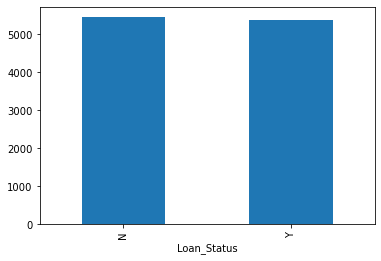

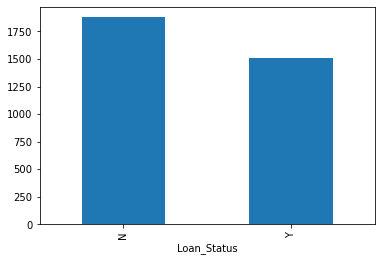

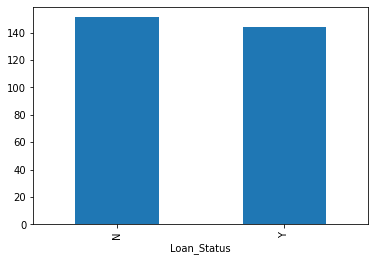

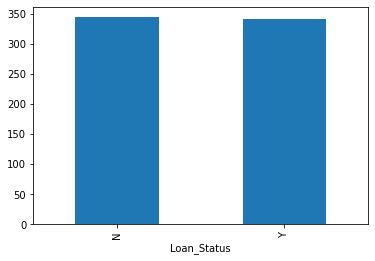

In [131]:
#numerical independent variables bivariate analysis

df_num=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in df_num:
    #col=pd.crosstab(df[i],df['Loan_Status'])
    plt.figure()
    print(df.groupby('Loan_Status')[i].mean())
    df.groupby('Loan_Status')[i].mean().plot.bar()
    

## Multivariate Analysis

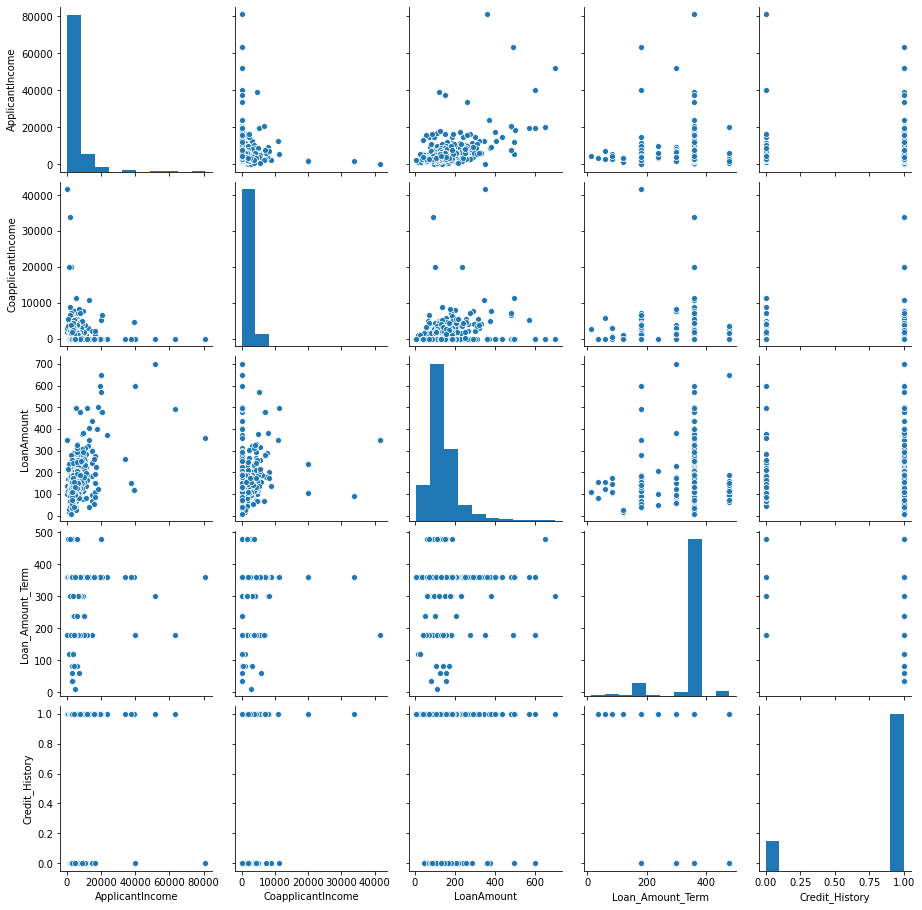

In [61]:
sns.pairplot(df)

## Converting categorical data into numeric data

In [137]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [138]:
categorical = df.select_dtypes(include = ['object']).dtypes.index
categorical

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

The above variables are categorical variables. Since our model needs numeric variables, so we will be doing Encoding to convert the categorical values to numerical values.

In [139]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [140]:
df['Married']=df.Married.map({'Yes':1,'No':0})

In [141]:
df['Dependents']=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [142]:
df['Gender']=df.Gender.map({'Male':1,'Female':0})

In [143]:
df['Education']=df.Education.map({'Graduate':1,'Not Graduate':0})

In [144]:
df['Self_Employed']=df.Self_Employed.map({'Yes':1,'No':0})

In [145]:
df['Property_Area']=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [146]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [134]:
df['Loan_Status']=df.Loan_Status.map({'Y':1,'N':0})

**Checking Correlation**

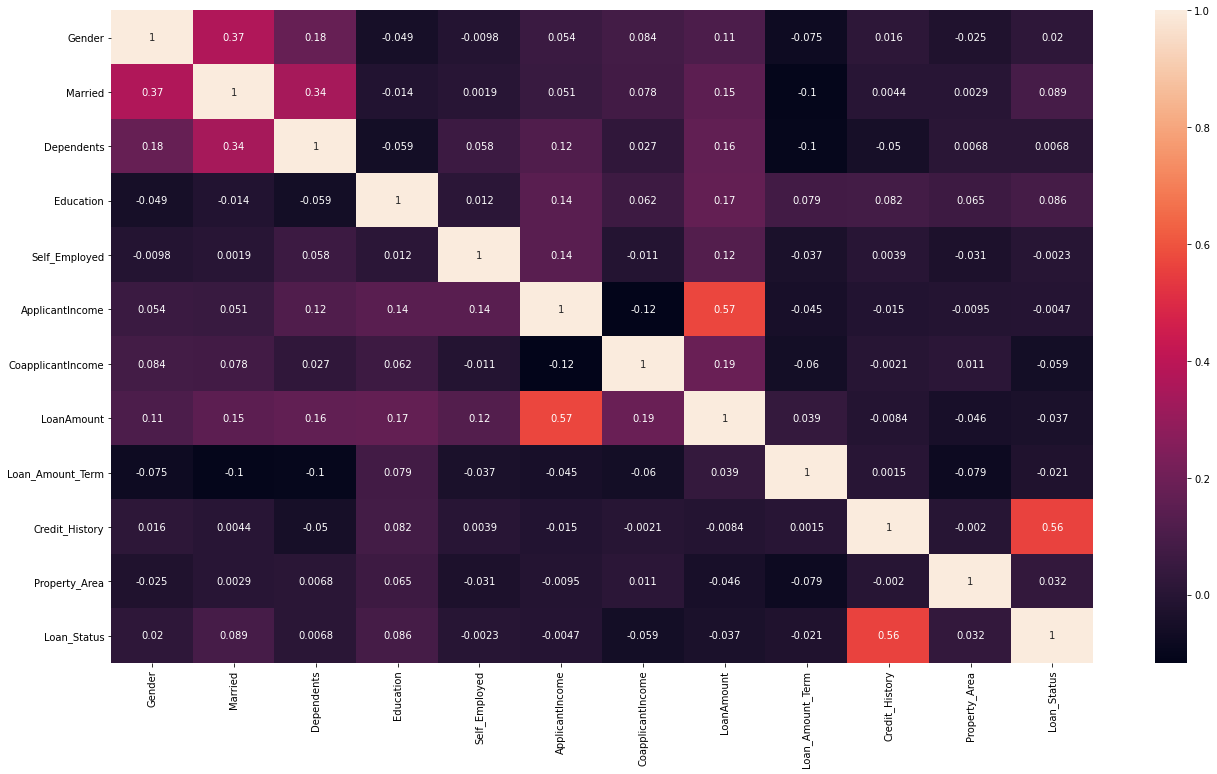

In [147]:
corr_mat=df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [148]:
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561678
Married              0.089280
Education            0.085884
Property_Area        0.032112
Gender               0.019857
Dependents           0.006781
Self_Employed       -0.002303
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. We can see some variables have positive correlation with the target variable.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation. We can see some variables have negative correlation with the target variable

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

Credit_History is the most closely related to the target variable. Other features like Marital Status and Education also impact the Loan Status.

Loan_ID does not play any role in prediction of our target variable, so we can drop it while building our model.

In [149]:
df.drop('Loan_ID', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [150]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling Missing Values

We have already seen the percentage of missing values in each feature. So now we will be removing those outliers.


There are missing values in columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider the following two methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset as that information will become inappropriate for our prediction model.

In [151]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

Lets check now if all the missing values have been removed.

In [152]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no missing value left now.

## Handling Outliers

In the plots above, we have already seen that there is skewness in some columns. Lets calculate the z score for these outliers and remove the outliers depending on z score.

Z-score indicates how far a particular data point is away from the mean. If z score is high for a datapoint, it means it is too distant from the mean, so should be removed considering an outlier.

In [153]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [154]:
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [157]:
df.shape

(614, 12)

In [159]:
df_new=df[(z<3).all(axis=1)]

In [160]:
df_new.shape

(577, 12)

We have now removed the outliers from our dataset.

Boxplot for original dataset


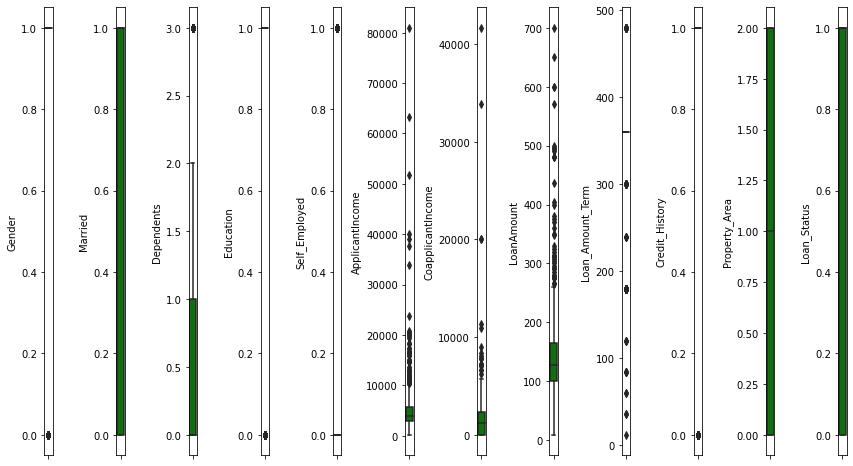

In [165]:
collist=df.columns.values
ncol=30
nrows=14
print('Boxplot for original dataset')
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Box plot after removing outliers


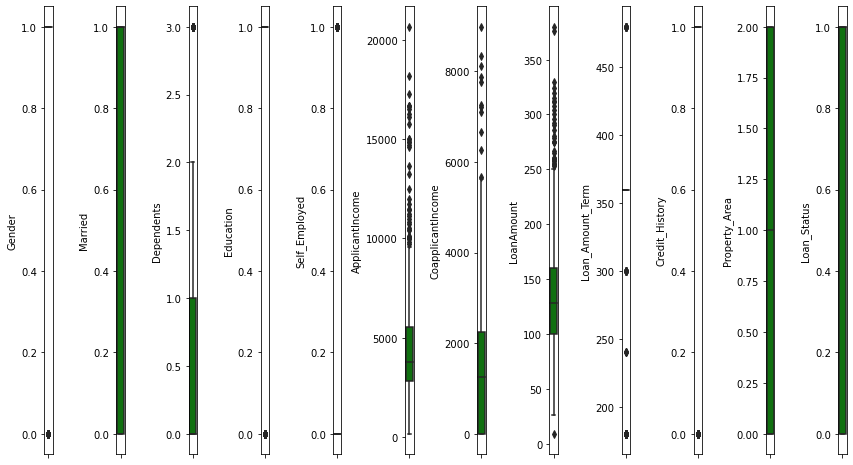

In [166]:
collist=df_new.columns.values
ncol=30
nrows=14
print('Box plot after removing outliers')
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

We can compare the plots before and after removing outliers, it clearly confirms that some of the extreme outliers have been removed from our dataset.

## Handling Skewness

We have seen in the plots earlier that there is skewness present in some of the columns. Lets try to remove that skewness. 

In [170]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

In [171]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

We can see that there is skewness present in Gender, Credit History, Applicant Income, Self Employed and other columns as well. But all these columns are categorical variables, so they can have only some discrete set of values. Like Gender can have value 0 and 1 only, so skewness is expected in these categorical variables and we prefer not to transform it to avoid any information distortion.

We can remove skewness from LoanAmount as it is not a categorical variable.

In [178]:
# Removing skewness in LoanAmount variable by log transformation
x['LoanAmount'] = np.log(x['LoanAmount'])

In [180]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount          -0.712432
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

We can see that skewness has reduced now in LoanAmount feature.

# ML Model Development

**Finding the best random state**

In [183]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8793103448275862 on random state  39


**Building the model**

Let's try different algorithms and find out the accuracy for each model. We will also consider the cross validation score to check if the accuracy is due to overfitting.

The model with high accuracy and low difference between accuracy score and cross validation score will be considered as the best fit model.

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=93)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_classify = [RandomForestClassifier(n_estimators=100),KNeighborsClassifier(n_neighbors = 5),GaussianNB() ,LinearSVC(), DecisionTreeClassifier(),AdaBoostClassifier(),LogisticRegression()]
df_result=pd.DataFrame(columns=['Model','Accuracy','Cross Validation Score','Difference'])


for model in model_classify:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    acc_final=acc*100
    print('Score: ', acc_final)
    scr=cross_val_score(m,x,y,cv=5)
    scr_final=(scr.mean())*100
    print('Cross validation score: ',scr_final)
    diff=((acc*100)-scr_final)
    print('Difference between cross validation score and accuracy is ', diff)
    print('Confusion matrix: ', confusion_matrix(y_test,pred))
    print('Classification report: ', classification_report(y_test,pred))
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Accuracy':acc_final,'Cross Validation Score':scr_final,'Difference':diff}, ignore_index=True)
    

Model:  RandomForestClassifier()
Score:  83.33333333333334
Cross validation score:  79.55172413793103
Difference between cross validation score and accuracy is  3.7816091954023108
Confusion matrix:  [[ 31  24]
 [  5 114]]
Classification report:                precision    recall  f1-score   support

           0       0.86      0.56      0.68        55
           1       0.83      0.96      0.89       119

    accuracy                           0.83       174
   macro avg       0.84      0.76      0.78       174
weighted avg       0.84      0.83      0.82       174

------------------------------------------------
Model:  KNeighborsClassifier()
Score:  69.54022988505747
Cross validation score:  61.69565217391304
Difference between cross validation score and accuracy is  7.8445777111444315
Confusion matrix:  [[ 11  44]
 [  9 110]]
Classification report:                precision    recall  f1-score   support

           0       0.55      0.20      0.29        55
           1       0.71  

In [188]:
df_result

,Model,Accuracy,Cross Validation Score,Difference
0,RandomForestClassifier(),83.333333,79.551724,3.781609
1,KNeighborsClassifier(),69.540230,61.695652,7.844578
2,GaussianNB(),84.482759,80.938531,3.544228
3,LinearSVC(),68.390805,62.716642,5.674163
4,DecisionTreeClassifier(),72.413793,73.482759,-1.068966
5,AdaBoostClassifier(),81.034483,78.346327,2.688156
6,LogisticRegression(),83.908046,81.634183,2.273863


We can see that Logistic Regression has maximum accuracy score with less overfitting, so this will be our best fit algorithm.

In [192]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is ',acc*100)

Accuracy is  83.9080459770115


**Feature Importance**

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Sklearn measures a feature importance by looking at how much the tree nodes uses that feature, reduced impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [193]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Credit_History,0.243
ApplicantIncome,0.212
LoanAmount,0.203
CoapplicantIncome,0.106
Dependents,0.052
Property_Area,0.049
Loan_Amount_Term,0.042
Education,0.029
Married,0.024


Now lets plot a graph for these values.

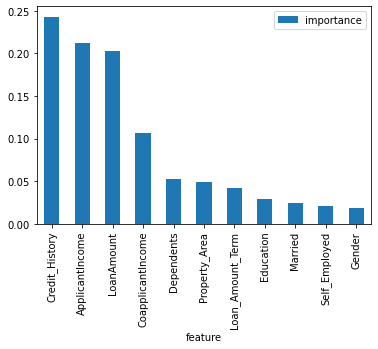

In [194]:
importances.plot.bar()

**Hyper Parameter Tuning using Grid Search CV**

In [196]:
parameters = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
from sklearn.model_selection import GridSearchCV, cross_val_score
LR = LogisticRegression()
clf = GridSearchCV(estimator=LR, param_grid=parameters, scoring='accuracy')
clf.fit(x_train, y_train)
clf.best_params_

{'C': 1, 'penalty': 'l2'}

Testing the model with our best fit parameters

In [200]:
LR = LogisticRegression(C=1,penalty='l2')

LR.fit(x_train, y_train)
pred = LR.predict(x_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' , accuracy_score(y_test,pred))
print('Precision Score : ', precision_score(y_test,pred))
print('Recall Score : ' , recall_score(y_test,pred))
print('F1 Score : ' , f1_score(y_test,pred))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,pred)

Accuracy Score :  0.8390804597701149
Precision Score :  0.8181818181818182
Recall Score :  0.9831932773109243
F1 Score :  0.8931297709923665


array([[ 29,  26],
       [  2, 117]], dtype=int64)

**Confusion Matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [201]:
predictions = cross_val_predict(LR, x_train, y_train, cv=3)
confusion_matrix(y_test, pred)

array([[ 29,  26],
       [  2, 117]], dtype=int64)

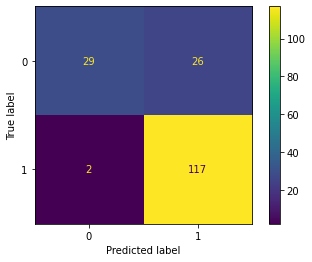

In [202]:
import sklearn
sklearn.metrics.plot_confusion_matrix(clf,x_test,y_test)

From the above plotting, we can see that 29 is True Positive Value and 117 is the True Negative Value.
26 and 2 are error terms and represent False Positive and False Negative respectively. This indicates that 26 applicants which are predicted positive for Loan approval are wrong  and 2 applicants are predicted as rejected which were not rejected.

**Precision and Recall**

Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Recall is a useful metric in cases where False Negative trumps False Positive.

In [203]:
# Precision and Recall:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7873563218390804
Recall: 0.982078853046595


This indicates that the model predicts 78% of the time, an applicant got approval which was predicted correctly (precision). The recall tells us that it predicted the approval of 66 % of the applicants who actually got approval.


**F1 Score**

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

But there is a catch here. The interpretability of the F1-score is poor. This means that we don’t know what our classifier is maximizing – precision or recall? So, we use it in combination with other evaluation metrics which gives us a complete picture of the result.

In [204]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.8740031897926636

**Precision Recall Curve**

For each applicant, the algorithm has to classify, it computes a probability based on a function and it classifies the application as approved (when the score is bigger the than threshold) or as not approved (when the score is smaller than the threshold). That’s why the threshold plays an important part. We will plot the precision and recall with the threshold using matplotlib:

Getting the probabilities of our predictions.

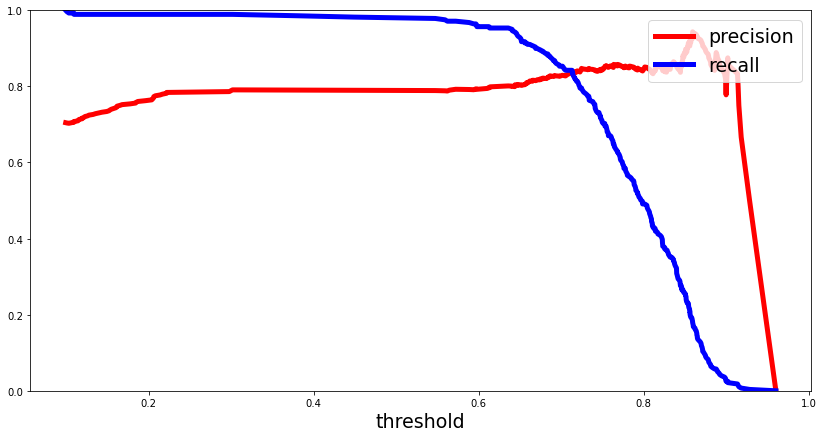

In [206]:
y_scores = LR.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

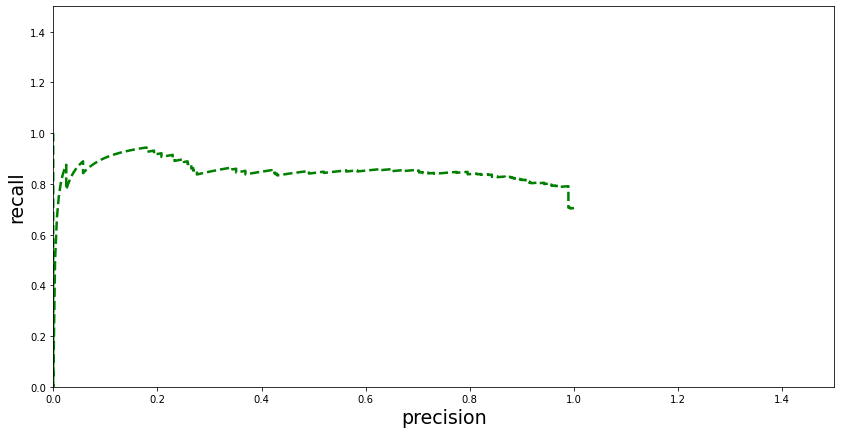

In [207]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

We can also use classification report to get 

In [210]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.53      0.67        55
           1       0.82      0.98      0.89       119

    accuracy                           0.84       174
   macro avg       0.88      0.76      0.78       174
weighted avg       0.86      0.84      0.82       174



## Saving the model

In [211]:
import joblib
joblib.dump(LR,'Loan Prediction.obj')

['Loan Prediction.obj']